In [16]:
import sklearn
import numpy as np
import os


import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.tree import plot_tree #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import plot_confusion_matrix



In [17]:

PROJECT_ROOT_DIR = "/Users/jeffreymullahey/Documents/GitHub/dataiku_census_project/dataiku_census_project/"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [18]:
import pandas as pd

df = pd.read_csv(PROJECT_ROOT_DIR + "census_income_learn_jcm.csv")
df.head()


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [19]:
# quick initial view of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        199523 non-null  int64  
 1   class_of_worker                            199523 non-null  object 
 2   detailed_industry_recode                   199523 non-null  int64  
 3   detailed_occupation_recode                 199523 non-null  int64  
 4   education                                  199523 non-null  object 
 5   wage_per_hour                              199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                 199523 non-null  object 
 7   marital_stat                               199523 non-null  object 
 8   major_industry_code                        199523 non-null  object 
 9   major_occupation_code                      199523 non-null  object 
 10  race    

In [20]:
df["target"].value_counts()

-50000     187141
50000+.     12382
Name: target, dtype: int64

In [21]:
# create binary version of target variable
df['income_flag']=df['target'].map({'-50000':0,'50000+.':1})

df = df.drop(["target"], axis= 1)
df.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income_flag
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


In [22]:
# basic stats of the continuous variables

df.describe()

# only 6.2% of training data has income_flag = 1


# continuous variables: 

# age, wage_per_hour, capital_gains, capital_losses, dividends_from_stocks, instance_weight, weeks_worked_in_year


,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_flag
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672,0.062058
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001,0.241261
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [23]:
# look into missing values
df.isin(['Not in universe', 'Not in universe or children', '?']).sum()

# I saw the Not in universe from the initial look at data
# saw to include 'or children' from value counts later in v1
# there are also a lot of 0's in fields like occupation code, but will just leave them as 0's

age                                               0
class_of_worker                              100245
detailed_industry_recode                          0
detailed_occupation_recode                        0
education                                         0
wage_per_hour                                     0
enroll_in_edu_inst_last_wk                   186943
marital_stat                                      0
major_industry_code                          100684
major_occupation_code                        100684
race                                              0
hispanic_origin                                   0
sex                                               0
member_of_a_labor_union                      180459
reason_for_unemployment                      193453
full_or_part_time_employment_stat                 0
capital_gains                                     0
capital_losses                                    0
dividends_from_stocks                             0
tax_filer_st

In [53]:
# df[input_variables].isin(['Not in universe', 'Not in universe or children', '?']).sum()
# input variables list is created later

has_capital_gains                         0
high_paying_own_business_self_employed    0
is_male                                   0
high_paying_marital_stat                  0
high_paying_education                     0
weeks_worked_in_year                      0
age                                       0
dtype: int64

In [24]:
# drop the variables that have almost all missing data

df = df.drop(["enroll_in_edu_inst_last_wk", "member_of_a_labor_union", "reason_for_unemployment",
                      "region_of_previous_residence", "state_of_previous_residence",
                     "fill_inc_questionnaire_for_veterans_admin"], axis= 1)

df.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,...,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_flag
0,73,Not in universe,0,0,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,9,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
4,10,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0


In [25]:
df.info()
# use this just to make sure the drop worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      199523 non-null  int64  
 1   class_of_worker                          199523 non-null  object 
 2   detailed_industry_recode                 199523 non-null  int64  
 3   detailed_occupation_recode               199523 non-null  int64  
 4   education                                199523 non-null  object 
 5   wage_per_hour                            199523 non-null  int64  
 6   marital_stat                             199523 non-null  object 
 7   major_industry_code                      199523 non-null  object 
 8   major_occupation_code                    199523 non-null  object 
 9   race                                     199523 non-null  object 
 10  hispanic_origin                 

## Look into the relationship of the continuous predictor variables with the categorical target variable

<AxesSubplot:xlabel='income_flag', ylabel='age'>

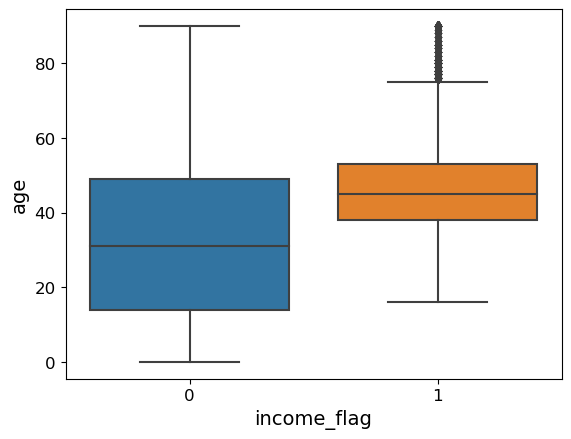

In [25]:
sns.boxplot(x='income_flag',y='age',data=df)

<AxesSubplot:xlabel='income_flag', ylabel='wage_per_hour'>

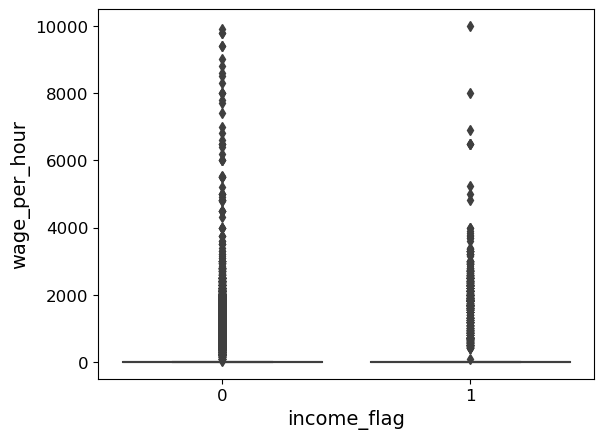

In [26]:
sns.boxplot(x='income_flag',y='wage_per_hour',data=df)

# doesn't look like much is available for wage_per_hour

<AxesSubplot:xlabel='income_flag', ylabel='capital_gains'>

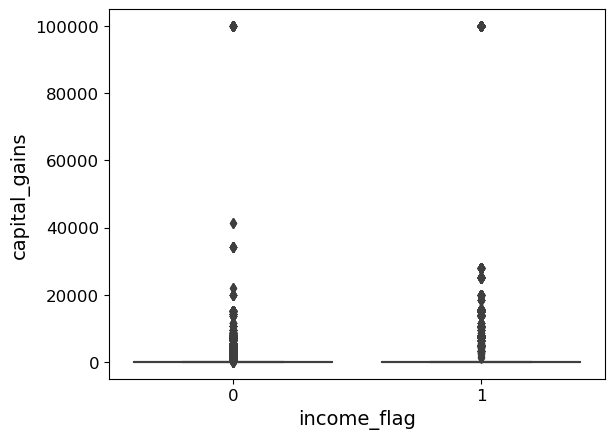

In [27]:
sns.boxplot(x='income_flag',y='capital_gains',data=df)

<AxesSubplot:xlabel='income_flag', ylabel='capital_losses'>

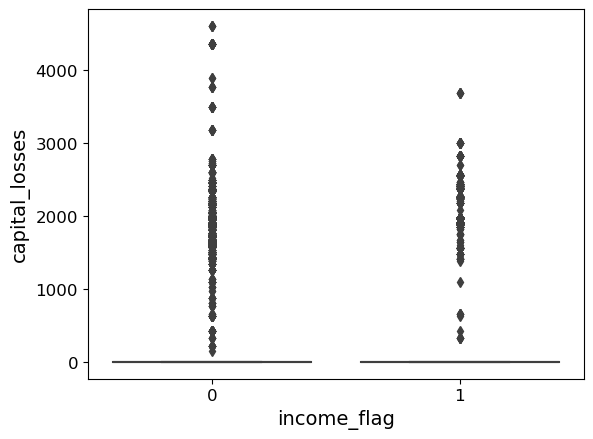

In [28]:
sns.boxplot(x='income_flag',y='capital_losses',data=df)

<AxesSubplot:xlabel='income_flag', ylabel='dividends_from_stocks'>

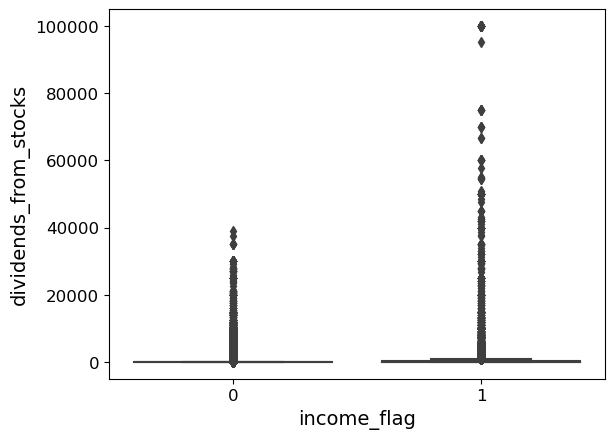

In [29]:
sns.boxplot(x='income_flag',y='dividends_from_stocks',data=df)

<AxesSubplot:xlabel='income_flag', ylabel='instance_weight'>

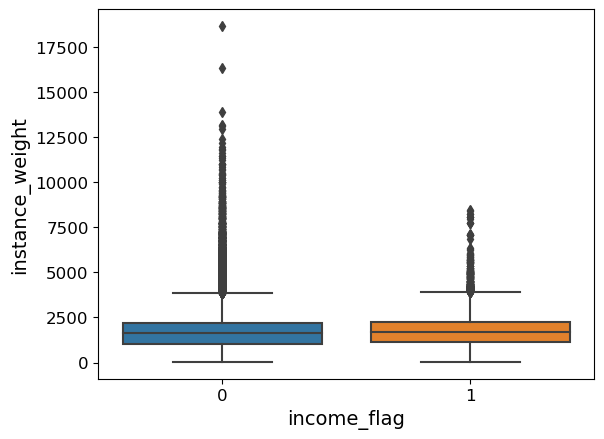

In [30]:
sns.boxplot(x='income_flag',y='instance_weight',data=df)

<AxesSubplot:xlabel='income_flag', ylabel='weeks_worked_in_year'>

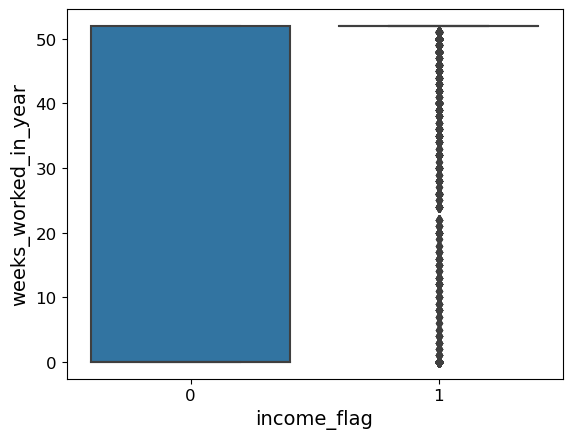

In [31]:
sns.boxplot(x='income_flag',y='weeks_worked_in_year',data=df)

# well that looks interesting
# maybe create a categorical variable that shows if you worked the whole year

## Look into categorical variables

In [26]:
# turn all missing values into ?
# using ? instead of np.nan because it shows as a value in value counts later

df['class_of_worker']=df['class_of_worker'].replace('Not in universe', 'missing')


df.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,...,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_flag
0,73,missing,0,0,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,missing,0,0,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,9,missing,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
4,10,missing,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0


# See how much of the 50k+ population shows up in each class of these categorical variables

In [13]:
df.groupby('class_of_worker')['income_flag'].mean().sort_values(ascending=False)

class_of_worker
Self-employed-incorporated        0.347320
Federal government                0.204103
Self-employed-not incorporated    0.129070
State government                  0.114739
Local government                  0.108813
Private                           0.101655
missing                           0.009018
Without pay                       0.006061
Never worked                      0.004556
Name: income_flag, dtype: float64

In [14]:
df['class_of_worker'].value_counts()

missing                           100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: class_of_worker, dtype: int64

In [27]:
df.loc[df['class_of_worker'].isin(["Self-employed-incorporated", "Self-employed-incorporated"]), 
       'high_paying_workclass'] = 1

df.loc[~df['class_of_worker'].isin(["Self-employed-incorporated", "Self-employed-incorporated"]), 
       'high_paying_workclass'] = 0

df[['class_of_worker', 'high_paying_workclass']].head(10)

,class_of_worker,high_paying_workclass
0,missing,0.0
1,Self-employed-not incorporated,0.0
2,missing,0.0
3,missing,0.0
4,missing,0.0
5,Private,0.0
6,Private,0.0
7,Private,0.0
8,Local government,0.0
9,Private,0.0


In [10]:
df.groupby('education')['income_flag'].mean().sort_values(ascending=False)

education
Prof school degree (MD DDS DVM LLB JD)    0.540435
Doctorate degree(PhD EdD)                 0.520190
Masters degree(MA MS MEng MEd MSW MBA)    0.311573
Bachelors degree(BA AB BS)                0.197080
Associates degree-academic program        0.094430
Associates degree-occup /vocational       0.077081
Some college but no degree                0.064234
High school graduate                      0.038817
12th grade no diploma                     0.015992
11th grade                                0.010180
7th and 8th grade                         0.008992
10th grade                                0.008204
1st 2nd 3rd or 4th grade                  0.007226
5th or 6th grade                          0.006713
9th grade                                 0.006100
Less than 1st grade                       0.001221
Children                                  0.000000
Name: income_flag, dtype: float64

In [28]:
df.loc[df['education'].isin(["Prof school degree (MD DDS DVM LLB JD)",
                                           "Doctorate degree(PhD EdD)", "Masters degree(MA MS MEng MEd MSW MBA)",
                                           "Bachelors degree(BA AB BS)"]), 'high_paying_education'] = 1

df.loc[~df['education'].isin(["Prof school degree (MD DDS DVM LLB JD)",
                                           "Doctorate degree(PhD EdD)", "Masters degree(MA MS MEng MEd MSW MBA)",
                                           "Bachelors degree(BA AB BS)"]), 'high_paying_education'] = 0

df[['education', 'high_paying_education']].head(10)

,education,high_paying_education
0,High school graduate,0.0
1,Some college but no degree,0.0
2,10th grade,0.0
3,Children,0.0
4,Children,0.0
5,Some college but no degree,0.0
6,Bachelors degree(BA AB BS),1.0
7,High school graduate,0.0
8,Some college but no degree,0.0
9,Some college but no degree,0.0


In [52]:
df.groupby('marital_stat')['income_flag'].mean().sort_values(ascending=False)

marital_stat
Married-civilian spouse present    0.113984
Divorced                           0.083871
Married-spouse absent              0.063241
Separated                          0.045665
Widowed                            0.031540
Married-A F spouse present         0.022556
Never married                      0.012916
Name: income_flag, dtype: float64

In [29]:
df.loc[df['marital_stat'].isin(["Married-civilian spouse present",
                                           "Divorced"]), 'high_paying_marital_stat'] = 1

df.loc[~df['marital_stat'].isin(["Married-civilian spouse present",
                                           "Divorced"]), 'high_paying_marital_stat'] = 0

df[['marital_stat', 'high_paying_marital_stat']].head(10)

,marital_stat,high_paying_marital_stat
0,Widowed,0.0
1,Divorced,1.0
2,Never married,0.0
3,Never married,0.0
4,Never married,0.0
5,Married-civilian spouse present,1.0
6,Married-civilian spouse present,1.0
7,Never married,0.0
8,Married-civilian spouse present,1.0
9,Married-civilian spouse present,1.0


In [57]:
df.groupby('sex')['income_flag'].mean().sort_values(ascending=False)

sex
Male      0.101728
Female    0.025610
Name: income_flag, dtype: float64

In [30]:
df.loc[df['sex'].isin(["Male"]), 'is_male'] = 1

df.loc[~df['sex'].isin(["Male"]), 'is_male'] = 0

df[['sex', 'is_male']].head(10)

,sex,is_male
0,Female,0.0
1,Male,1.0
2,Female,0.0
3,Female,0.0
4,Female,0.0
5,Female,0.0
6,Male,1.0
7,Female,0.0
8,Female,0.0
9,Male,1.0


In [75]:
df.groupby('own_business_or_self_employed')['income_flag'].mean().sort_values(ascending=False)

own_business_or_self_employed
1    0.225723
2    0.081780
0    0.057851
Name: income_flag, dtype: float64

In [31]:
df['own_business_or_self_employed'] = df['own_business_or_self_employed'].apply(str)

df.loc[df['own_business_or_self_employed'].isin(["1"]), 'high_paying_own_business_self_employed'] = 1

df.loc[~df['own_business_or_self_employed'].isin(["1"]), 'high_paying_own_business_self_employed'] = 0

df[['own_business_or_self_employed', 'high_paying_own_business_self_employed']].head(10)

,own_business_or_self_employed,high_paying_own_business_self_employed
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,2,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [32]:
df.loc[df['capital_gains'] > 0, 'has_capital_gains'] = 1
df.loc[df['capital_gains'] <= 0, 'has_capital_gains'] = 0
df[['capital_gains', 'has_capital_gains']].head(10)

,capital_gains,has_capital_gains
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,5178,1.0
7,0,0.0
8,0,0.0
9,0,0.0


In [116]:
df.groupby('has_capital_gains')['income_flag'].mean().sort_values(ascending=False)

has_capital_gains
1.0    0.326874
0.0    0.051888
Name: income_flag, dtype: float64

In [33]:
input_variables = [
'has_capital_gains',
'high_paying_own_business_self_employed',
'is_male',
'high_paying_marital_stat',
'high_paying_education',
'weeks_worked_in_year',
'age']

In [34]:
X = df[input_variables]

In [35]:
X.head()

,has_capital_gains,high_paying_own_business_self_employed,is_male,high_paying_marital_stat,high_paying_education,weeks_worked_in_year,age
0,0.0,0.0,0.0,0.0,0.0,0,73
1,0.0,0.0,1.0,1.0,0.0,52,58
2,0.0,0.0,0.0,0.0,0.0,0,18
3,0.0,0.0,0.0,0.0,0.0,0,9
4,0.0,0.0,0.0,0.0,0.0,0,10


In [36]:
X.dtypes

has_capital_gains                         float64
high_paying_own_business_self_employed    float64
is_male                                   float64
high_paying_marital_stat                  float64
high_paying_education                     float64
weeks_worked_in_year                        int64
age                                         int64
dtype: object

In [37]:
y = df['income_flag']

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_flag, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [40]:
clf_dt = DecisionTreeClassifier(random_state=42, max_leaf_nodes=7)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.4, 0.9, 'high_paying_education <= 0.5\ngini = 0.116\nsamples = 139666\nvalue = [130999, 8667]\nclass = <50k'),
 Text(0.2, 0.7, 'weeks_worked_in_year <= 45.5\ngini = 0.055\nsamples = 118992\nvalue = [115648, 3344]\nclass = <50k'),
 Text(0.1, 0.5, 'gini = 0.011\nsamples = 79669\nvalue = [79215, 454]\nclass = <50k'),
 Text(0.3, 0.5, 'is_male <= 0.5\ngini = 0.136\nsamples = 39323\nvalue = [36433, 2890]\nclass = <50k'),
 Text(0.2, 0.3, 'gini = 0.053\nsamples = 18219\nvalue = [17718, 501]\nclass = <50k'),
 Text(0.4, 0.3, 'gini = 0.201\nsamples = 21104\nvalue = [18715, 2389]\nclass = <50k'),
 Text(0.6, 0.7, 'is_male <= 0.5\ngini = 0.382\nsamples = 20674\nvalue = [15351, 5323]\nclass = <50k'),
 Text(0.5, 0.5, 'gini = 0.222\nsamples = 9762\nvalue = [8523, 1239]\nclass = <50k'),
 Text(0.7, 0.5, 'weeks_worked_in_year <= 47.5\ngini = 0.468\nsamples = 10912\nvalue = [6828, 4084]\nclass = <50k'),
 Text(0.6, 0.3, 'gini = 0.244\nsamples = 2610\nvalue = [2239, 371]\nclass = <50k'),
 Text(0.8, 0

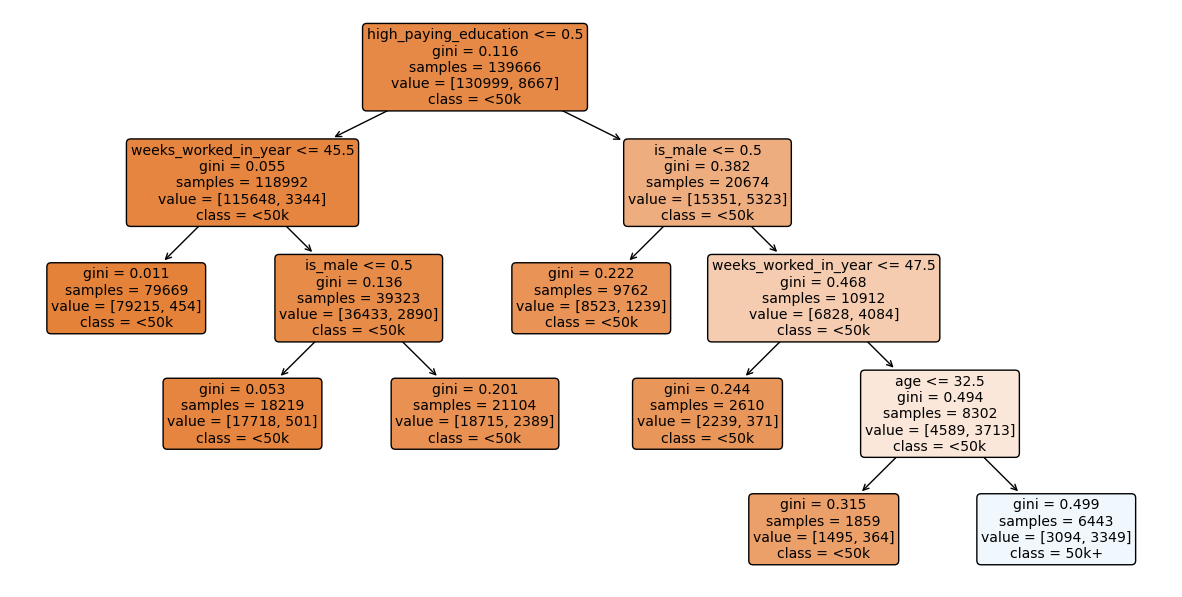

In [41]:

plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["<50k", "50k+"],
         feature_names = X.columns)


In [ ]:
#save_fig("preliminary_tree")

In [59]:
importances = clf_dt.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking")
for ind in range(X.shape[1]):
    print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking
high_paying_education : 0.5232
is_male : 0.2185
weeks_worked_in_year : 0.1727
age : 0.0855
high_paying_marital_stat : 0.0
high_paying_own_business_self_employed : 0.0
has_capital_gains : 0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


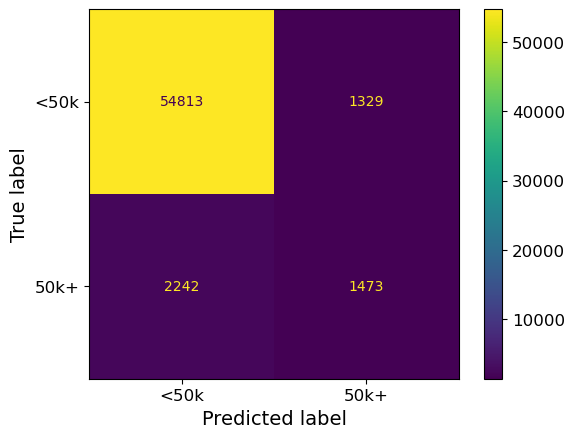

In [42]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["<50k", "50k+"])

In [43]:
clf_dt.score(X_test, y_test)

0.9403411463989174

y_pred = clf_dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

In [54]:
# now compare a logistic regression

from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression()

In [55]:
#logistic regression score
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9422958050019212

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


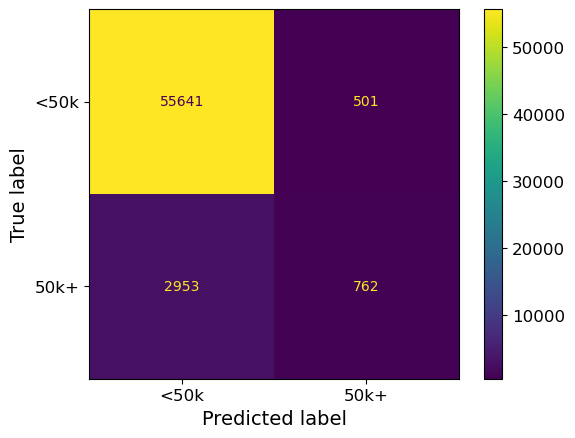

In [56]:
plot_confusion_matrix(log_reg, X_test, y_test, display_labels=["<50k", "50k+"])

In [57]:
y_pred = log_reg.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56142
           1       0.60      0.21      0.31      3715

    accuracy                           0.94     59857
   macro avg       0.78      0.60      0.64     59857
weighted avg       0.93      0.94      0.93     59857



In [60]:
print("Training set score: {:.3f}".format(log_reg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(log_reg.score(X_test,y_test)))

Training set score: 0.942
Test set score: 0.942


In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.317912
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            income_flag   No. Observations:               139666
Model:                          Logit   Df Residuals:                   139659
Method:                           MLE   Df Model:                            6
Date:                Wed, 04 Jan 2023   Pseudo R-squ.:                 -0.3669
Time:                        10:06:23   Log-Likelihood:                -44401.
converged:                       True   LL-Null:                       -32484.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
has_capital_gains                          2.2026   